# Import Libraries

In [4]:
import random
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import copy
import logging
import missingno
import operator
from collections import Counter
from imblearn.over_sampling import (
    SMOTE,
    RandomOverSampler,
    SVMSMOTE,
    BorderlineSMOTE,
    ADASYN,
    SMOTEN,
    SMOTENC
)
from imblearn.under_sampling import (
    TomekLinks,
    RandomUnderSampler,
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
    AllKNN,
    CondensedNearestNeighbour,
    ClusterCentroids,
    NearMiss
)
from sklearn.model_selection import (
    LeaveOneOut,
    LeavePOut,
    RepeatedKFold,
    StratifiedKFold,
    TimeSeriesSplit,
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    learning_curve,
    KFold
)
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import (
    LabelEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelBinarizer,
    MultiLabelBinarizer,
    MaxAbsScaler,
    QuantileTransformer,
    PowerTransformer,
    Normalizer
)
from sklearn.feature_extraction import (
    DictVectorizer,
    FeatureHasher
)
from sklearn.ensemble import (
    VotingClassifier,
    VotingRegressor
)
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    matthews_corrcoef,
    balanced_accuracy_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import ( # type: ignore
    Input,
    Dense,
    Dropout,
    BatchNormalization,
    ReLU,
    LeakyReLU,
    PReLU,
    Activation,
    Conv2D,
    Flatten,
    ELU,
    LSTM,
    GRU
)
from tensorflow.keras.activations import swish # type: ignore
from tensorflow.keras.losses import ( # type: ignore
    MeanSquaredError,
    MeanAbsoluteError,
    Huber,
    BinaryCrossentropy,
    Hinge,
    CategoricalCrossentropy,
    SparseCategoricalCrossentropy
)
from tensorflow.keras.models import ( # type: ignore
    Model,
    Sequential
)
from tensorflow.keras.regularizers import ( # type: ignore
    l2,
    l1
)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint # type: ignore
from tensorflow.keras.optimizers import ( # type: ignore
    SGD,
    Adagrad,
    RMSprop,
    Adam,
    Adadelta,
    Adamax,
    Nadam
)
from tensorflow.keras.initializers import ( # type: ignore
    GlorotUniform,
    HeNormal
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from scipy.stats import uniform, randint
from typing import (
    Any,
    Literal,
    Union,
    List,
    Optional,
    Dict,
    Tuple
)
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
logging.basicConfig(level=logging.INFO)

# Call_def

In [87]:
from DL_def import (
    read_data,
    columns_info,
    not_useful_columns,
    convert_to_numeric,
    target_last_col,
    remove_missing_rows,
    fill_missing_values_dataFrame,
    fill_missing_values_column,
    check_outliers,
    box_plot_all_columns,
    get_columns_with_2_unique_values,
    analyze_null_columns,
    check_balance_classification,
    rate_by_group,
    over_under_sampling_classification,
    plot_groupby,
    plot_pivot,
    plot_pivot_2,
    plot_groupby_and_pivot,
    calculate_correlation,
    Heatmap_Correlation,
    create_custom_scatter_plot,
    plot_histograms,
    encode_column,
    get_x_y_TT,
    get_x_y_TVT,
    validate_test_data_categorical_columns,
    get_x_y_TT_shape,
    get_x_y_TVT_shape,
    scale_data,
    get_cross_validator,
    get_hidden_layer_activation,
    get_output_layer_activation,
    get_optimizer,
    get_loss,
    get_x_y,
    plot_feature_importance,
    plots_evaluate_models,
)

# call_visualization_def

In [8]:
from DL_visualization import (
    plot_line,
    plot_line_matplotlib,
    plot_line_all_column,
    plot_line_seaborn,
    plot_line_plotly,
    scatter_plot_matplotlib,
    scatter_plot_seaborn,
    scatter_plot_plotly,
    reg_plot,
    resid_plot,
    bar_plot_matplotlib,
    bar_plot_seaborn,
    bar_plot_all_column,
    bar_plot_plotly,
    multiple_bar_plot_matplotlib,
    multiple_bar_plots_seaborn,
    multiple_bar_plots_plotly,
    cat_plot,
    cat_plot_all_column,
    facet_grid_seaborn,
    pie_chart,
    pie_chart_plotly,
    plot_single_histogram_matplotlib,
    plot_histograms_matplotlib,
    plot_single_histogram_seaborn,
    plot_histograms_seaborn,
    plot_histograms_plotly,
    kde_plot,
    kde_plot_all_column,
    count_plot,
    count_plot_all_column,
    count_plot_plotly,
    box_plot_matplotlib,
    box_plot_seaborn,
    box_plot_plotly,
    box_plot_all_column,
    heatmap_plot,
    heatmap_plot_plotly,
    pair_plot,
    pair_plot_plotly,
    violin_plot,
    violin_plot_plotly,
    plot_violin_all_column,
    joint_plot,
    plot_parallel_coordinates,
    plot_contour,
    plot_tricontourf,
    custom_plot
)

# Download the dataset

In [9]:
!pip install opendatasets

In [10]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: zyadashrafamar
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023


100%|██████████| 143M/143M [00:01<00:00, 143MB/s]


# Read_Data

In [11]:
df = read_data(r'/content/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv')
true_original_df = copy.deepcopy(df)
print(df.shape)
df.head()

the DataFrame dont have any duplicates row
Data read successfully from /content/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv
(568630, 31)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [12]:
target_column = 'Class'

In [13]:
# Make the target is last column
df = target_last_col(df,target_column)

# Get Information of Data

In [14]:
df_columns = df.columns.to_list()
print(df_columns)

['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [15]:
columns_info(df)

,names,dtypes,unique,n_unique,number_of_rows,number_of_null
0,id,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",568630,568630,0
1,V1,float64,"[-0.2606478048943981, 0.9850997342386376, -0.2...",552035,568630,0
2,V2,float64,"[-0.4696484500536342, -0.3560450929163436, -0....",552035,568630,0
3,V3,float64,"[2.496266082631564, 0.5580563509382045, 1.7285...",552035,568630,0
4,V4,float64,"[-0.0837239126781463, -0.4296539034065106, -0....",552035,568630,0
5,V5,float64,"[0.1296812361545678, 0.2771402629466986, 0.074...",552035,568630,0
6,V6,float64,"[0.7328982498449426, 0.4286045153379263, 1.419...",552035,568630,0
7,V7,float64,"[0.5190136179018007, 0.4064660422512956, 0.743...",552035,568630,0
8,V8,float64,"[-0.1300060475886773, -0.1331182741764908, -0....",552035,568630,0
9,V9,float64,"[0.7271592691096374, 0.3474518951767279, -0.26...",552035,568630,0


# drop not useful columns

#### list of columns

In [16]:
# not_useful_columns_name = []
# not_useful_columns(df=df, column_name=not_useful_columns_name)

#### single column

In [17]:
not_useful_columns(df=df, column_name="id")

# change the dtype of the column from object to numeric

#### list of columns

In [18]:
# convert_to_numeric_columns_name = ['Total Charges']
# convert_to_numeric(df=df, column_name=convert_to_numeric_columns_name)

#### single column

In [19]:
# convert_to_numeric(df=df, column_name='Total Charges')

# take copy for Visualization

In [20]:
original_df = copy.deepcopy(df)
original_df.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0


# Describe numerical column and his information

In [21]:
numerical_column = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_column)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [22]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


# Describe object column and his information

In [23]:
object_column =df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print(object_column)

[]


In [24]:
# df.describe(include=['object'])

# Data Encoding columns with 2 unique values

In [25]:
get_columns_with_2_unique_values(df)

In [26]:
# columns = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']
# df = encode_column(df, columns = columns, method='binary', binary_1='Yes', binary_0='No')

In [27]:
# columns = ['Gender']
# df = encode_column(df, columns = columns, method='binary', binary_1='Male', binary_0='Female')

In [28]:
# if the target column not binary
# columns = [target_column]
# true_original_df = encode_column(true_original_df, columns = columns, method='binary', binary_1='Yes', binary_0='No')

In [29]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


# check columns have nulls

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

In [31]:
null_columns = analyze_null_columns(df)
null_columns

The columns dtype is object: []
The columns dtype is numerical: []


,Column,Null Count,Type


## Identify columns with missing values

In [32]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# Removing Rows with Missing Values

#### list of columns

In [33]:
# remove_rows_column_name = ['Total Charges', '', '']
# remove_missing_rows(df=df, column_name=remove_rows_column_name)

#### single column

In [34]:
# remove_missing_rows(df=df, column_name='Total Charges')

#### from all DataFrame

In [35]:
# remove_missing_rows(df=df)

## check columns with missing values

In [36]:
# # Identify columns with missing values
# missing_columns = df.columns[df.isnull().any()].tolist()
# print("Columns with missing values: \n" , missing_columns)

# Filling Missing Values

### Filling Missing Values for all DataFrame

In [37]:
# df = fill_missing_values_dataFrame(df, model='KNNImputer', n_neighbors=3)

### Filling Missing Values for column

#### list of columns

In [38]:
# fill_missing_columns = ['', '', '']
# df = fill_missing_values_column(df, columns=fill_missing_columns, model='KNNImputer', n_neighbors=3)

#### single column

In [39]:
# df = fill_missing_values_column(df, columns='Total Charges', model='KNNImputer', n_neighbors=3)

### check columns with missing values

In [40]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# check outliers

## check outliers and skew with box plot

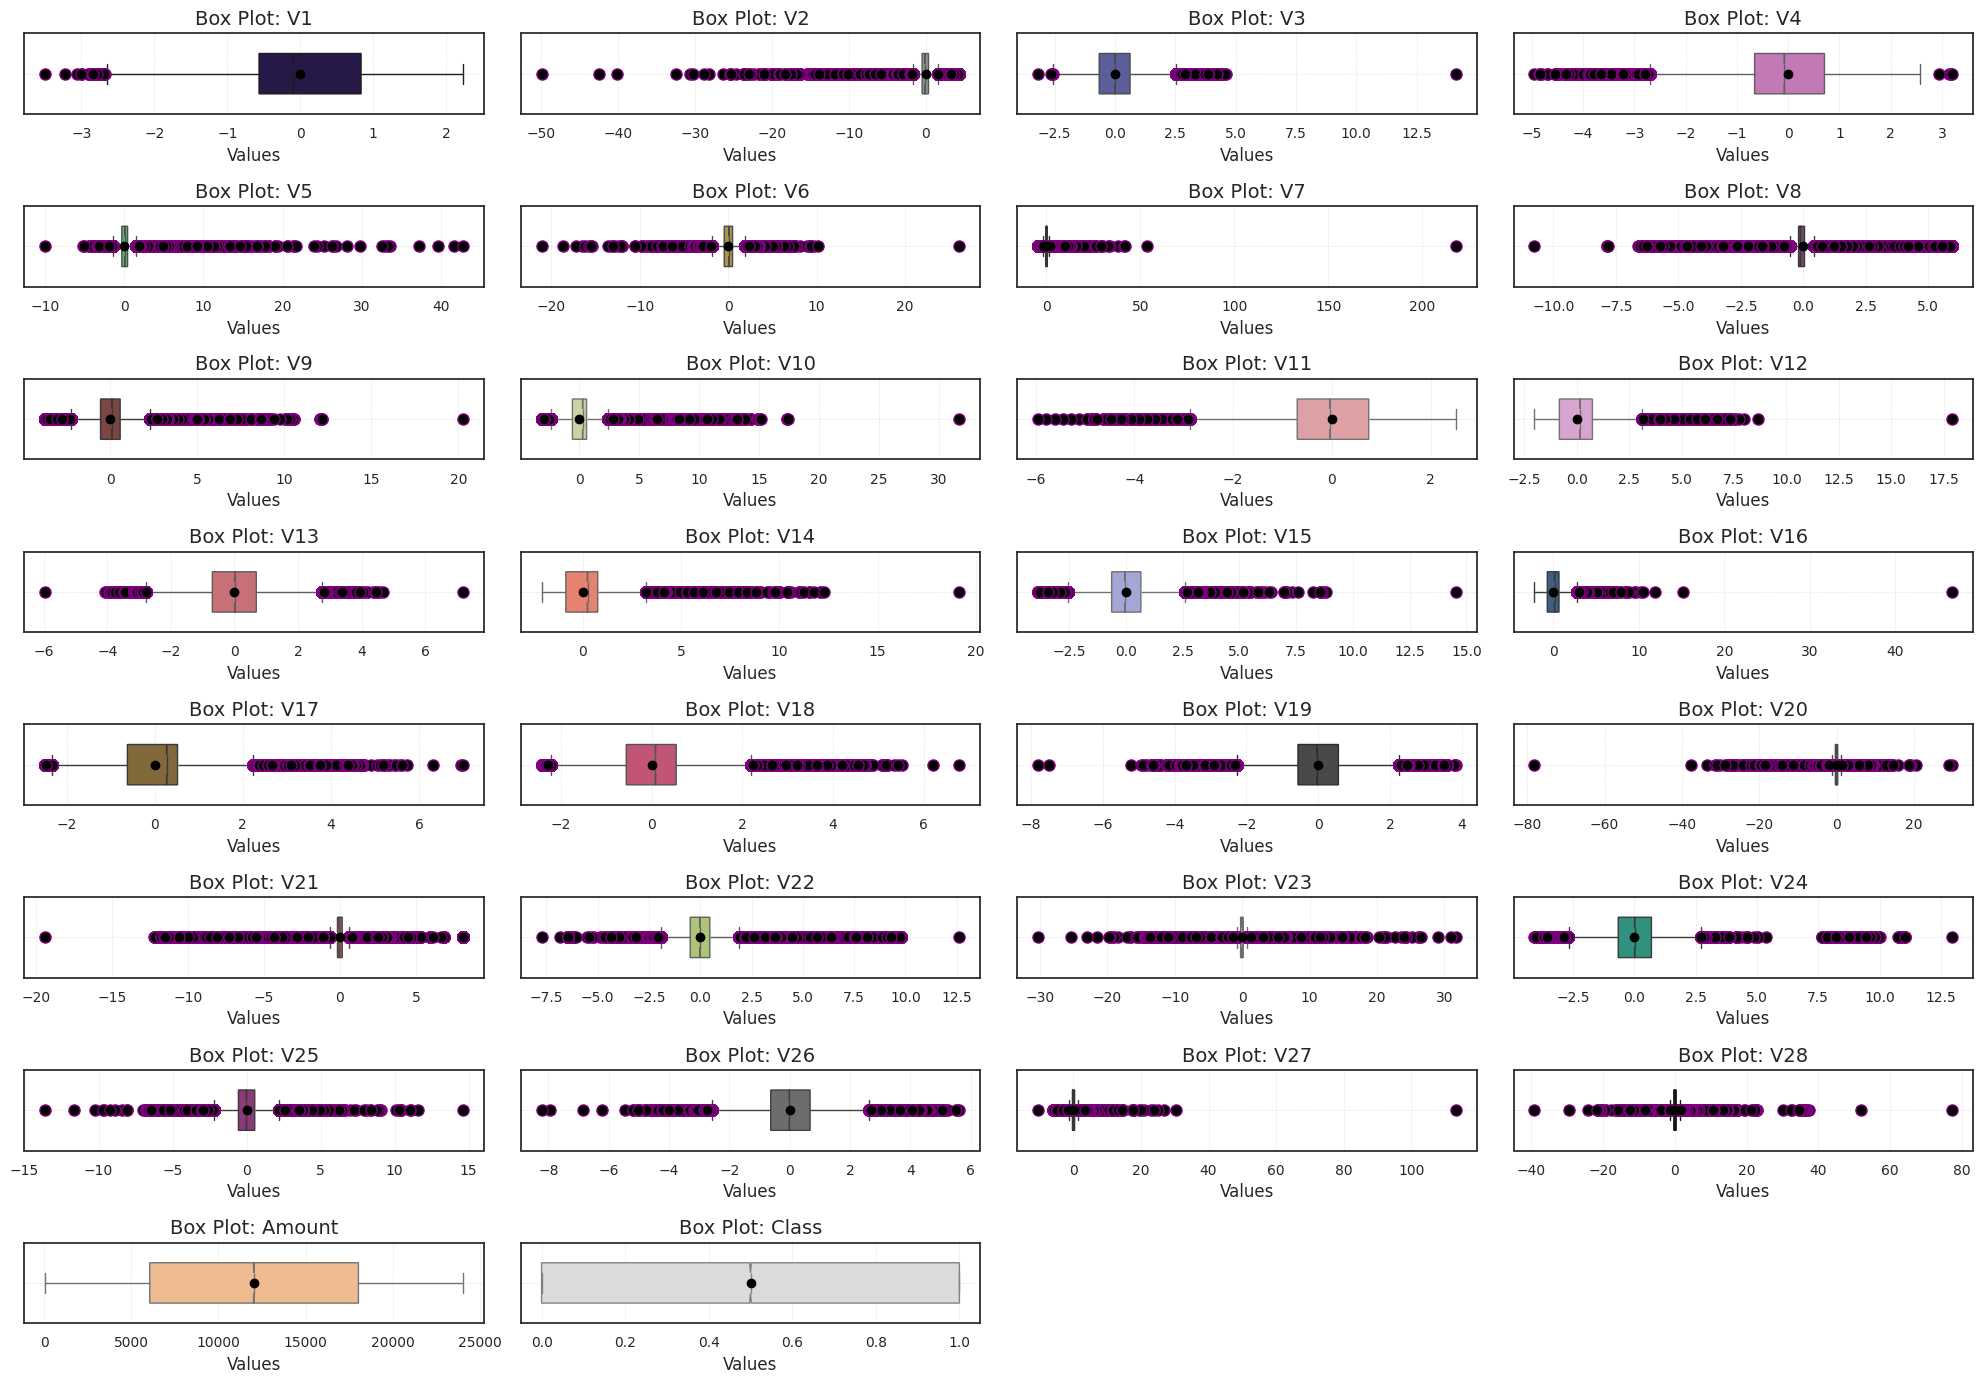

In [41]:
box_plot_all_columns(df, subplot_row = 4, figsize=(20, 14))

## check outliers IQR

### Numbers

In [42]:
# outliers_df, outlier_counts = check_outliers_IQR(df)

### Scatter Plot

In [43]:
# plot_outliers_scatterplot_IQR(original_df, outlier_counts)

## Handle Outliers IQR

In [44]:
outliers_column = []

# df = handle_outliers_IQR(df, outliers_column, method='cap')

# df = handle_outliers_IQR(df, outliers_column, method='remove')
# df = handle_outliers_IQR(df, outliers_column, method='impute', imputation_method='mean')
# df = handle_outliers_IQR(df, outliers_column, method='transform', transformation_method='boxcox')

In [45]:
# outliers_df, outlier_counts = check_outliers_IQR(df)

## check outliers Z-Score

### Numbers

In [46]:
# numeric_df, z_scores, outlier_counts_zscore = check_outliers_zscore(df)

### Scatter Plot

In [47]:
# plot_outliers_scatterplot_zscore(z_scores, outlier_counts_zscore)

## Handle Outliers Z-Score

In [48]:
outliers_column = []

# df = handle_outliers_zscore(df, outliers_column, method='cap')

# df = handle_outliers_zscore(df, outliers_column, method='remove')
# df = handle_outliers_zscore(df, outliers_column, method='impute', imputation_method='mean')
# df = handle_outliers_zscore(df, outliers_column, method='transform', transformation_method='boxcox')

In [49]:
# numeric_df, z_scores, outlier_counts_zscore = check_outliers_zscore(df)

# skew

In [50]:
# columns_right_skewed, columns_left_skewed = calculate_skewness(df)

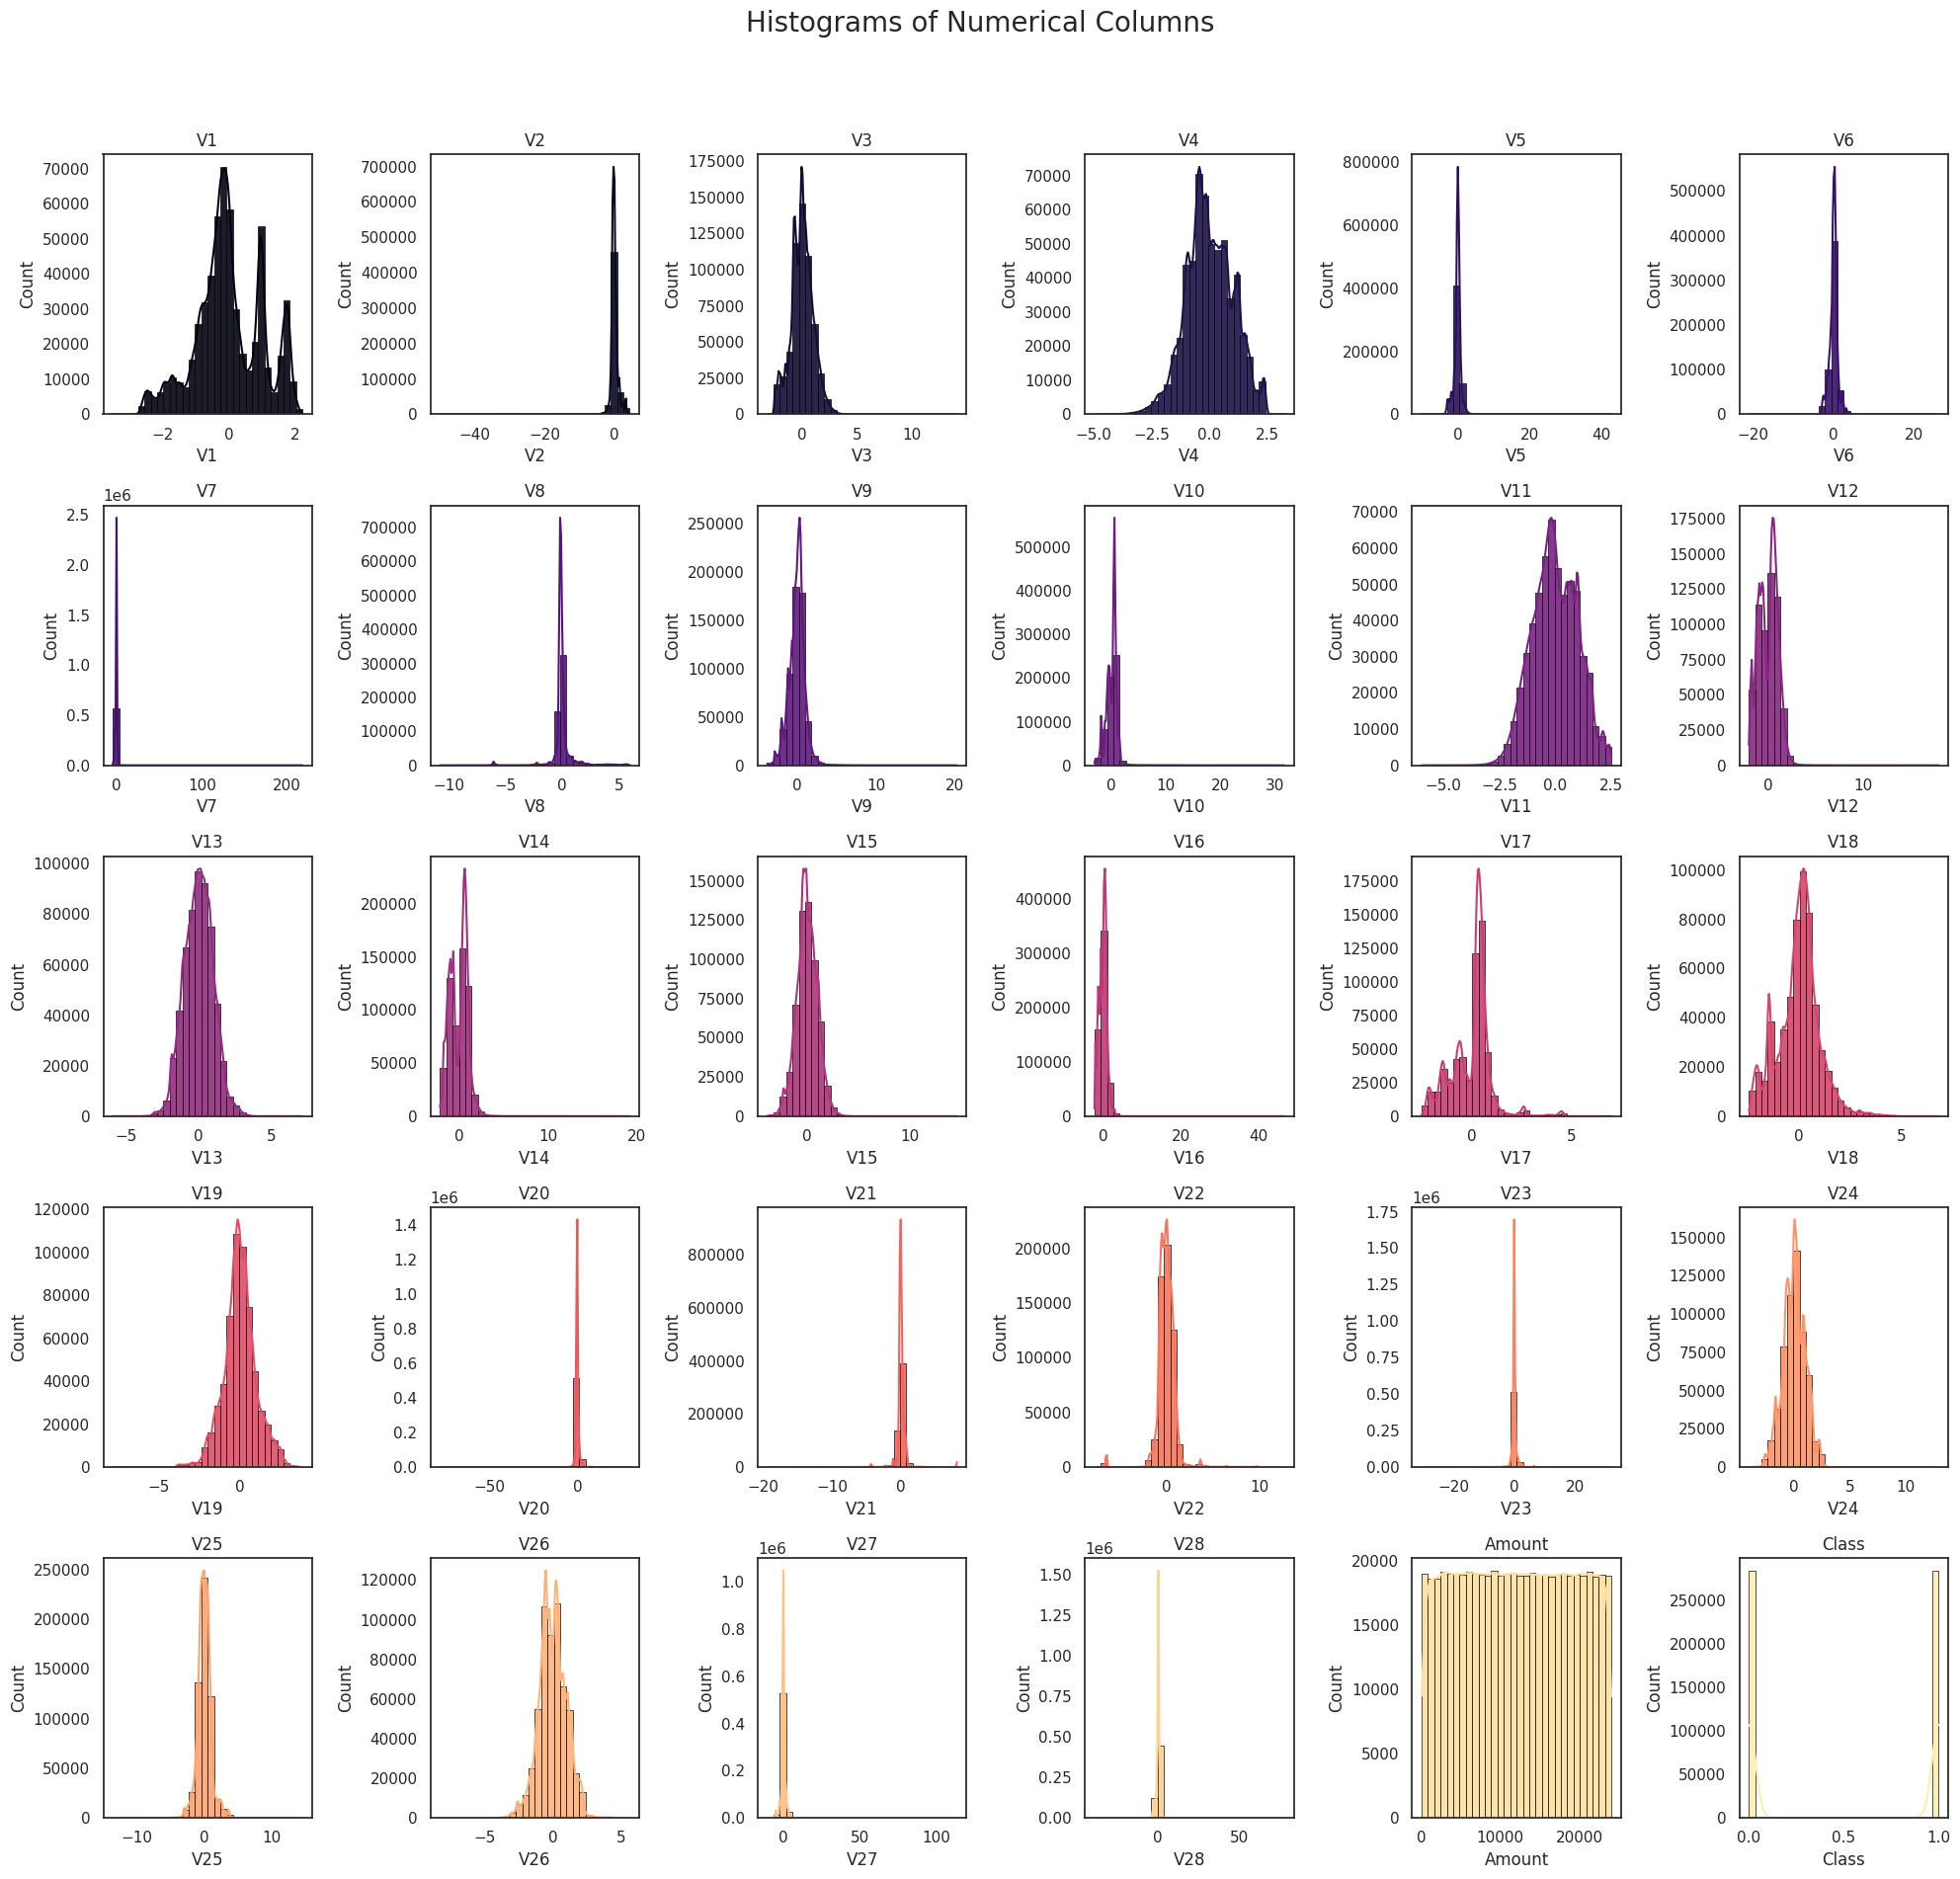

In [51]:
plot_histograms(df,column=None, bins=30, single_histogram_figsize = (20, 20), all_histograms_figsize = (20, 20))

In [52]:
# skewness_columns = []
# skewness_columns_second = []

# df = handle_skewness(df, skewness_columns, method='yeo_johnson')
# df = handle_skewness(df, skewness_columns_second, method='robust_scale')
# df = handle_skewness(df, skewness_columns, method='yeo_johnson')


In [53]:
# columns_right_skewed, columns_left_skewed = calculate_skewness(df)

In [54]:
# plot_histograms(df,column=None, bins=30, single_histogram_figsize = (20, 20), all_histograms_figsize = (20, 20))

## check outliers and skew with box plot

In [55]:
# box_plot_all_columns(df, subplot_row = 3, figsize=(16, 12))

# Check the unbalance data

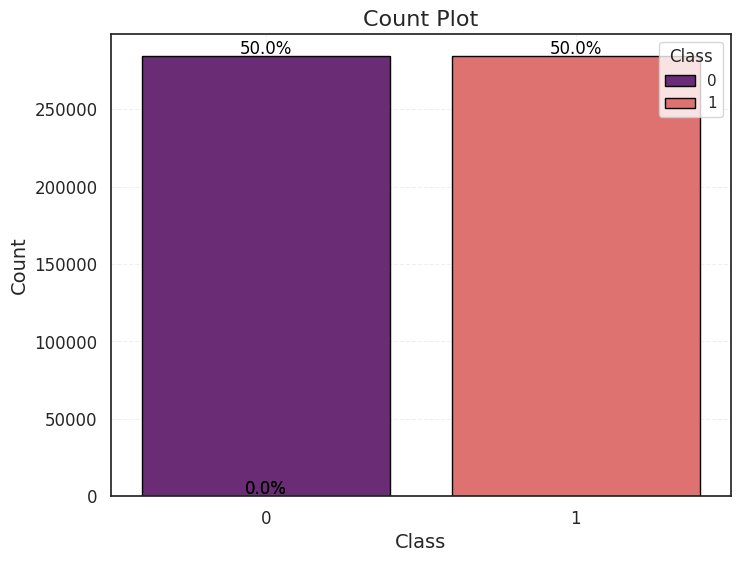

,count
name,
0,284315
1,284315


In [56]:
check_balance_classification(df,column_plot=target_column)

# Visualization

## info from the data

In [57]:
# age_Exited_rates = rate_by_group(true_original_df, 'MaritalStatus', 'Churn', 'CustomerID', positive_class=1, threshold=4)

In [58]:
# NumOfProducts_Exited_rates = rate_by_group(true_original_df, 'PrizmCode', 'Churn', 'CustomerID', positive_class=1)

In [59]:
# Geography_Exited_rates = rate_by_group(true_original_df, 'CreditRating', 'Churn', 'CustomerID', positive_class=1)

In [60]:
# Tenure_Exited_rates = rate_by_group(true_original_df, 'RetentionOffersAccepted', 'Churn', 'CustomerID', positive_class=1, threshold=5)

In [61]:
# Tenure_Exited_rates = rate_by_group(true_original_df, 'RetentionCalls', 'Churn', 'CustomerID', positive_class=1, threshold=5)
# Tenure_Exited_rates

## chart

In [62]:
# PaymentMethod_name = df['PrizmCode'].value_counts().index.to_list()
# PaymentMethod_values = df['PrizmCode'].value_counts().values.tolist()
# # pie_chart(labels=PaymentMethod_name, sizes=PaymentMethod_values, title="Payment Methods")
# pie_chart_plotly(labels=PaymentMethod_name, sizes=PaymentMethod_values, title="Prizm Code")


In [63]:
# InternetService_name = df['MaritalStatus'].value_counts().index.to_list()
# InternetService_values = df['MaritalStatus'].value_counts().values.tolist()
# # pie_chart(labels=InternetService_name, sizes=InternetService_values, title="Payment Methods")
# pie_chart_plotly(labels=InternetService_name, sizes=InternetService_values, title="Marital Status")

In [64]:
# Contract_name = original_df['CreditRating'].value_counts().index.to_list()
# Contract_values = original_df['CreditRating'].value_counts().values.tolist()
# # pie_chart(labels=Contract_name, sizes=Contract_values, title="Payment Methods")
# pie_chart_plotly(labels=Contract_name, sizes=Contract_values, title="Credit Rating")

In [65]:
# Contract_name = original_df['RetentionCalls'].value_counts().index.to_list()
# Contract_values = original_df['RetentionCalls'].value_counts().values.tolist()
# # pie_chart(labels=Contract_name, sizes=Contract_values, title="Payment Methods")
# pie_chart_plotly(labels=Contract_name, sizes=Contract_values, title="Retention Calls")

## Multiple bar

HasCreditCard
RetentionCalls
CreditRating

In [66]:
# grouped_data = original_df.groupby(['HasCreditCard', 'Churn']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ['not Churn', 'Churn']

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='HasCreditCard by Churn Status', xlabel='HasCreditCard Type', ylabel='Count')

In [67]:
# grouped_data = original_df.groupby(['RetentionCalls', 'Churn']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ['not Churn', 'Churn']

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='RetentionCalls by Churn Status', xlabel='RetentionCalls Type', ylabel='Count')

In [68]:
# grouped_data = original_df.groupby(['CreditRating', 'Churn']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ['not Churn', 'Churn']

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='CreditRating by Churn Status', xlabel='CreditRating Type', ylabel='Count')

In [69]:
# grouped_data = original_df.groupby(['CreditRating', 'HasCreditCard']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ["Hasn't Credit Card","Has Credit Card"]

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='CreditRating by HasCreditCard Status', xlabel='CreditRating', ylabel='Count')

In [70]:
# grouped_data = original_df.groupby(['RetentionCalls', 'PrizmCode']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ['Other', 'Rural','Suburban', 'Town']

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='NumOfProducts by PrizmCode Status', xlabel='NumOfProducts', ylabel='Count')

## Bar

In [71]:
# column_counts = original_df['ThreewayCalls'].value_counts().reset_index()
# column_counts.columns = ['ThreewayCalls', 'value']

# bar_plot_plotly(df=column_counts, x='ThreewayCalls', y='value', hue='value')

In [72]:
# column_counts = original_df['HasCreditCard'].value_counts().reset_index()
# column_counts.columns = ['HasCreditCard', 'value']

# bar_plot_seaborn(df=column_counts, x='HasCreditCard', y='value',palette='viridis')

In [73]:
# column_counts = original_df['RetentionCalls'].value_counts().reset_index()
# column_counts.columns = ['RetentionCalls', 'value']

# bar_plot_matplotlib(column_counts['RetentionCalls'], column_counts['value'],x_rotation=0)

## count plot

In [74]:
# count_plot(df=original_df , x='RetentionOffersAccepted' , hue='Churn')

In [75]:
# categorical_features=original_df.drop(['ServiceArea'],axis=1).select_dtypes(exclude=['int64', 'float64']).columns.tolist()
# count_plot_all_column(categorical_features, original_df, vision='x', num_of_column=4)

## Violin

In [76]:
# violin_plot(data=original_df, x='TruckOwner', y='MonthlyRevenue', hue='TruckOwner',split=True) #catagorical column in x and numircal in y

In [77]:
# violin_plot(data=original_df, x='HasCreditCard', y='PercChangeRevenues', hue='HasCreditCard') #catagorical column in x and numircal in y

In [78]:
# plot_violin_all_column(df, figsize=(30, 30), n_cols=6)

## Histogram

In [79]:
# plot_single_histogram_seaborn(original_df,x='MonthsInService', bins=50, palette='magma', show=False)
# plt.axvline(np.mean(original_df["MonthsInService"]) , color = "black" , label ="The Mean of the tenure")
# plt.axvline(np.median(original_df["MonthsInService"]) , color = "blue" , label ="The Median of the tenure")
# plt.show()

In [80]:
# plot_histograms(original_df,column=None, bins=30, single_histogram_figsize = (20, 20), all_histograms_figsize = (30, 30))

#  Groupby and pivot

### Groupby

In [81]:
# grouped_df = df.groupby('')

### pivot

In [82]:
# pivot_df = df.pivot_table(values='values', index='category', columns='sub_category', aggfunc='mean')

# Correlation Coefficient

## Calculate Correlation

In [83]:
calculate_correlation(df, outcome_column=target_column,num_results=7)

Calculating Pearson correlation coefficients for numeric columns against the outcome column: {outcome_column}
Top 7 results:
   Variable  Pearson Coefficient  P-Value
13      V14            -0.805669      0.0
11      V12            -0.768579      0.0
3        V4             0.735981      0.0
10      V11             0.724278      0.0
2        V3            -0.682095      0.0
9       V10            -0.673665      0.0
8        V9            -0.585522      0.0

V14
The Pearson Correlation Coefficient for V14 is -0.8057 with a P-value of P = 0

V12
The Pearson Correlation Coefficient for V12 is -0.7686 with a P-value of P = 0

V4
The Pearson Correlation Coefficient for V4 is 0.7360 with a P-value of P = 0

V11
The Pearson Correlation Coefficient for V11 is 0.7243 with a P-value of P = 0

V3
The Pearson Correlation Coefficient for V3 is -0.6821 with a P-value of P = 0

V10
The Pearson Correlation Coefficient for V10 is -0.6737 with a P-value of P = 0

V9
The Pearson Correlation Coefficient f

,Variable,Pearson Coefficient,P-Value
13,V14,-0.805669,0.0
11,V12,-0.768579,0.0
3,V4,0.735981,0.0
10,V11,0.724278,0.0
2,V3,-0.682095,0.0
9,V10,-0.673665,0.0
8,V9,-0.585522,0.0


## Visualize Correlation with Bars

In [84]:
# df_corr = df.corr()[target_column].sort_values(ascending = False)
# df_corr_index = df_corr.index.to_list()
# df_corr_values = df_corr.values.tolist()
# df_corr = pd.DataFrame({'name': df_corr_index, 'values':df_corr_values})
# bar_plot_plotly(df=df_corr, x='name', y='values',hue='values', width=1500, height=650)

## Visualize Correlation with Heatmap

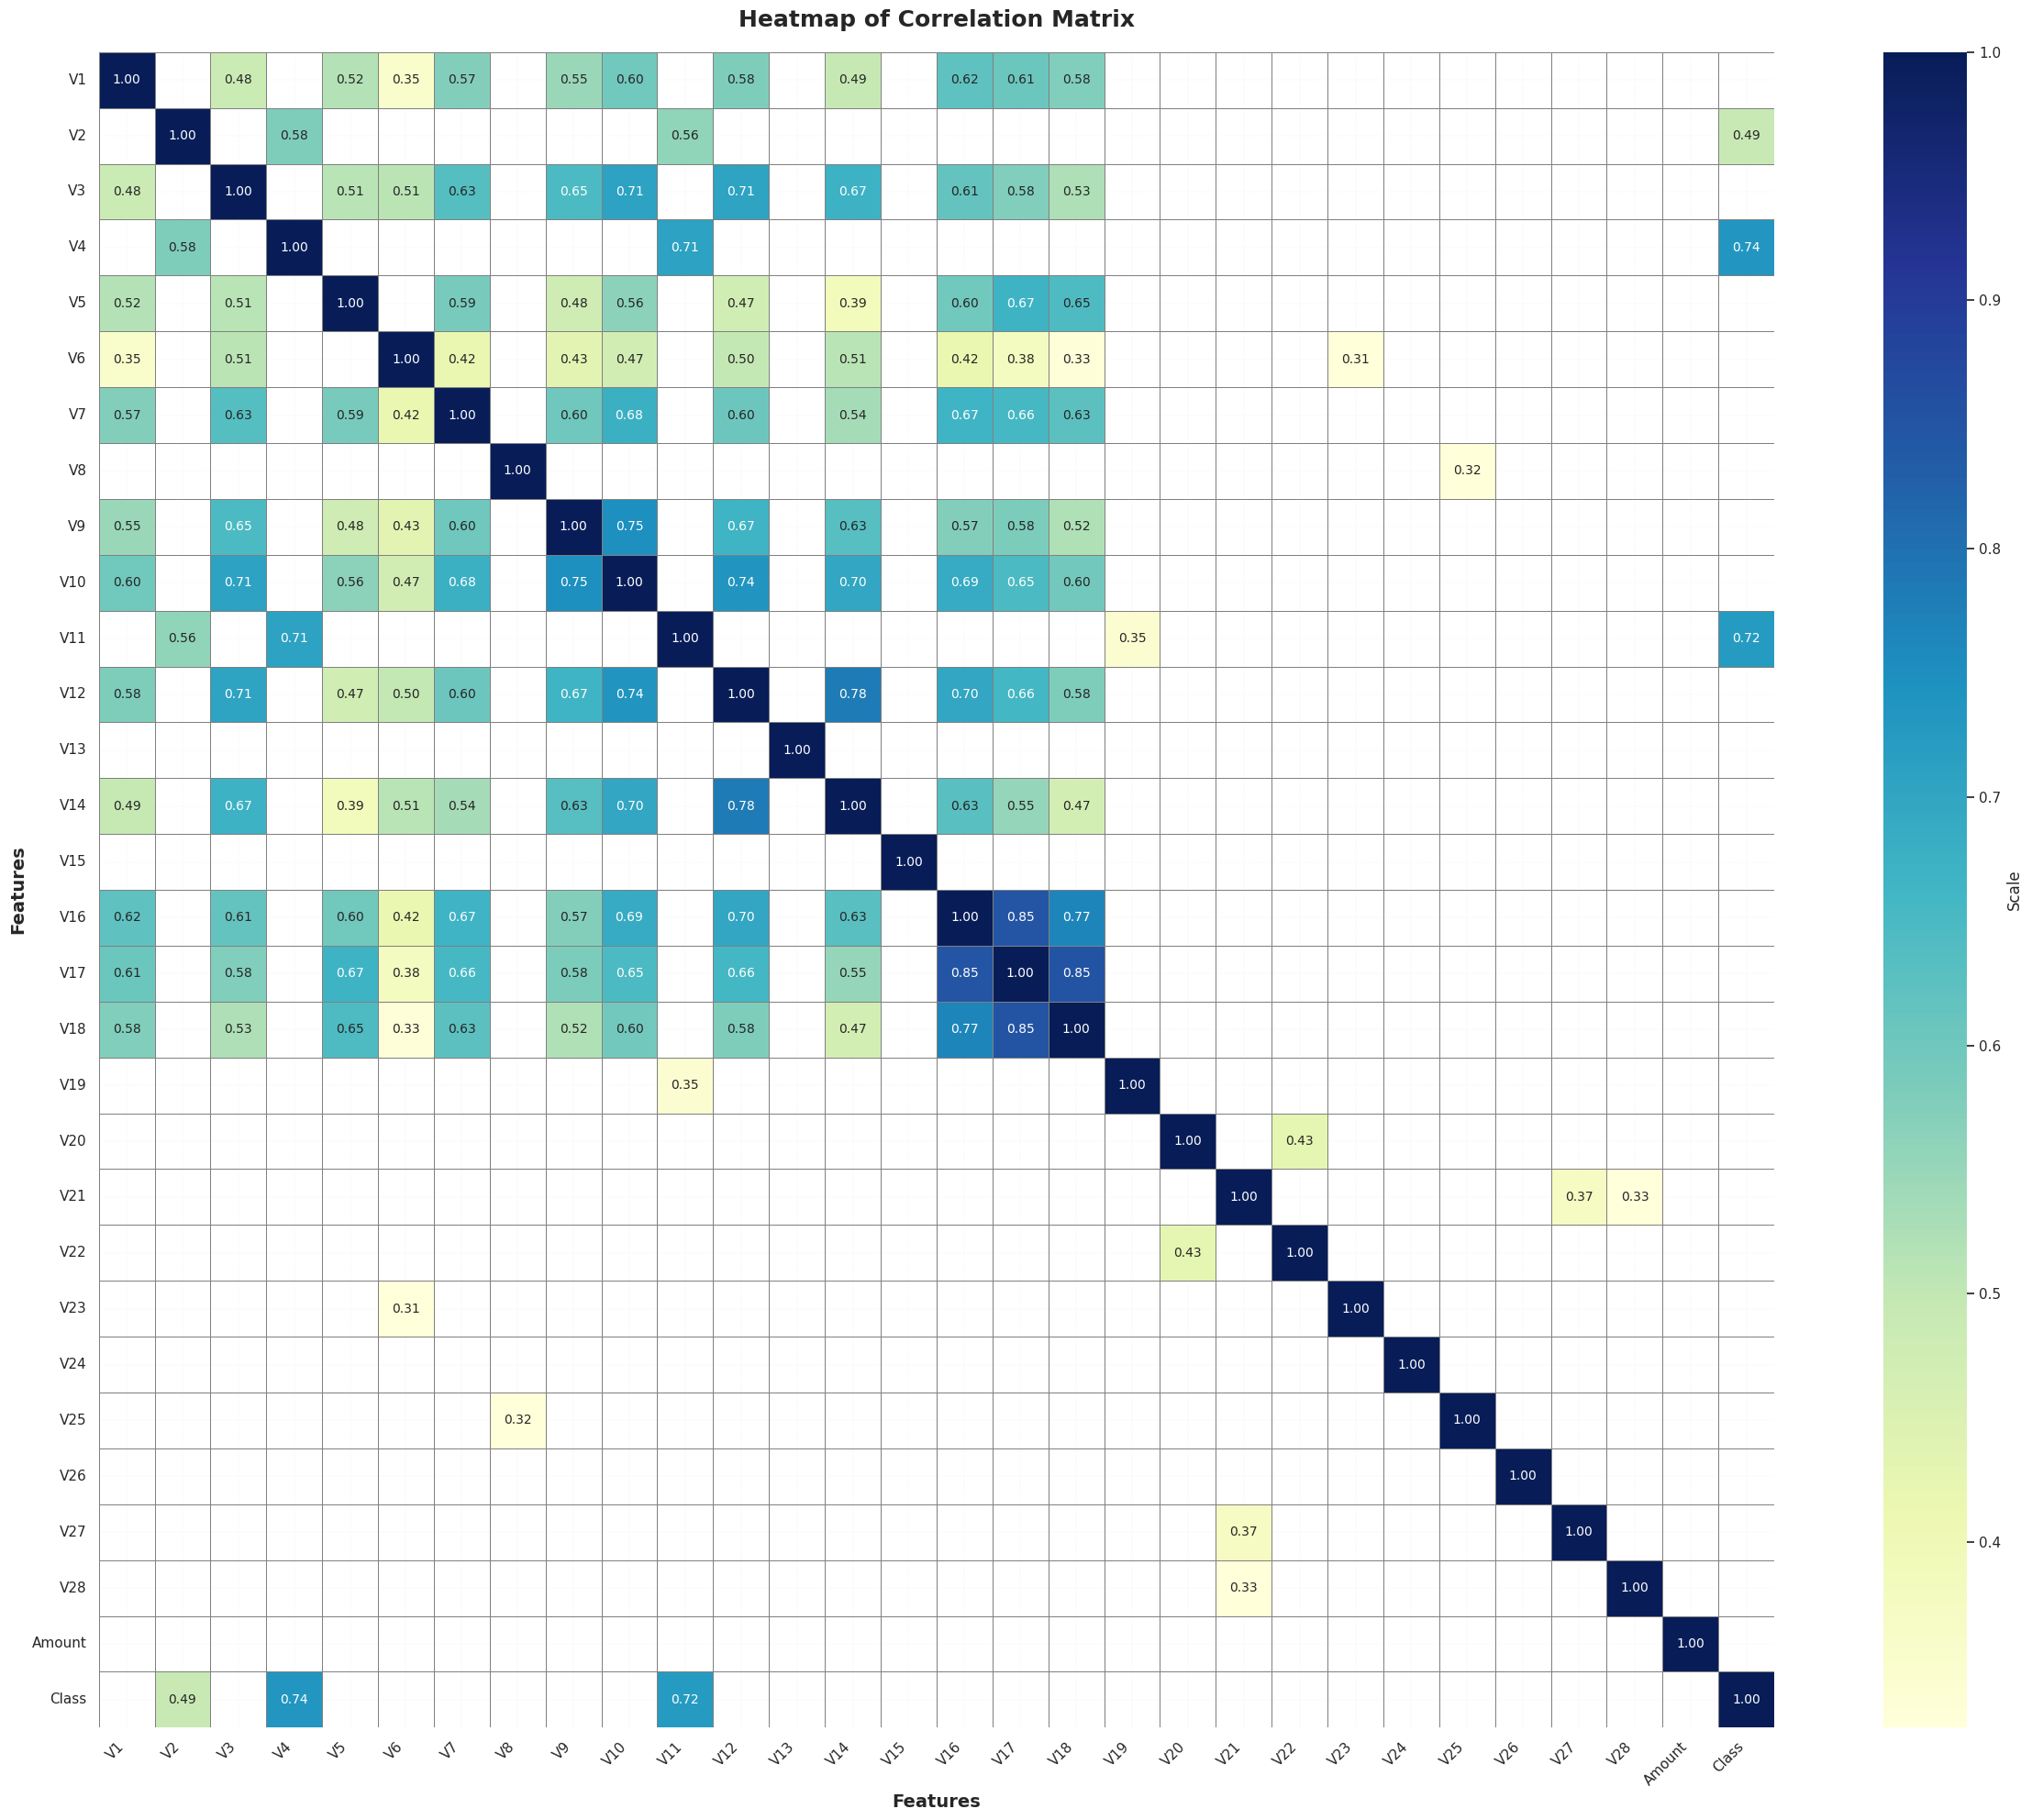

In [89]:
correlations = Heatmap_Correlation(df, mask=0.3, cmap="YlGnBu", save_path=None, annot_size = 10, figsize=(25, 20))

# Data Encoding

In [90]:
# df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

In [91]:
# ordinal_categories = df[''].value_counts().index.to_list()
# ordinal_categories

In [92]:
columns = []

# df = encode_column(df, columns = columns, method='get_dummies')

# df = encode_column(df, columns = 'City', method= 'label')
# df['City'] = df['City'].astype(float)

# ordinal_categories = df['CreditRating'].value_counts().index.to_list()
# df = encode_column(df, columns = 'CreditRating', method= 'ordinal', ordinal_categories=['1-Highest', '2-High', '3-Good', '4-Medium', '5-Low', '6-VeryLow', '7-Lowest'])

# df = encode_column(df, columns = '', method='target',target="")

# df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

In [93]:
len(df.columns)

30

## Make the target is last column

In [94]:
df = target_last_col(df, target_column)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


# Repair unbalanced data by using oversampling and undersampling.

In [95]:
x, y = get_x_y(df, target_column)

In [96]:
Counter(df[target_column])

Counter({0: 284315, 1: 284315})

In [97]:
# df, x, y = over_under_sampling_classification(x, y, over_sampling_strategy=0.75, n_jobs=-1)

### Check the unbalance data after repair

In [98]:
# check_balance_classification(df,column_plot=target_column)

# Get X , Y (TT)

In [99]:
x,y = get_x_y(df,target_column)

In [100]:
x_train, y_train, x_test, y_test = get_x_y_TT(df, target=target_column, test_size=0.2, stratify=True, shuffle=True, random_state=42)

In [101]:
get_x_y_TT_shape(x_train, y_train, x_test, y_test)

x_train shape = (454904, 29)
x_test shape = (113726, 29)
y_train shape = (454904,)
y_test shape = (113726,)


# Get X , Y (TVT)

In [102]:
# x,y = get_x_y(df,target_column)

In [103]:
# x_train, y_train, x_valid, y_valid, x_test, y_test = get_x_y_TVT(df, target=target_column)

In [104]:
# get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid, x_test, y_test)

# Get train, valid and test data in same time

In [105]:
# df.columns.tolist()
# x_train , y_train ,x_valid , y_valid , x_test , y_test = train_valid_test_split(df , target='Churn Value',train_size=0.7,valid_size=0.1,test_size=0.2,random_state=42)
# get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid , x_test, y_test)

# Scaling

## TT

In [106]:
x_train, x_test = scale_data(x_train = x_train, x_test = x_test)

## TVT

In [107]:
# x_train, x_valid, x_test = scale_data(x_train, x_valid, x_test)

# Train

In [108]:
type_cross_valid = get_cross_validator(cv_type='KFold', cv=5)

## information for DL train

In [109]:
# To reduce the Overfitting can use
## 1- kernel_regularizer=l2(0.01) but it decreases the accuracy
## 2- train the model many times by use Cross-Validation
## 3- EarlyStopping
## 4- Dropout
## 5- Batch Normalization
## 6- Weight Sharing Conv2D() use with image

In [110]:
# Hidden layer Activation Function
## 1- 'sigmoid'
## 2- 'tanh'
## 3- 'relu'
## 4- model.add(LeakyReLU(alpha=0.1))
## 5- model.add(PReLU())
## 6- 'elu' Or model.add(ELU(alpha=1.0))
## 7- swish Or def swish(x):
#                  return x * tf.nn.sigmoid(x)
#              model.add(Activation(swish))

In [111]:
# output layer Activation Function and Cost Functions

## a) Regression
### 1- In AF no Activation Function or 'linear' with CF 'mean_squared_error'
### 2- In AF 'tanh' with CF 'mean_absolute_error'
### 3- In AF 'relu' with CF Huber()

## b) Binary Classification
### 1- In AF 'sigmoid' with CF 'binary_crossentropy'
### 2- In AF 'sigmoid' with CF 'hinge'

## c) Multi-Class Classification
### 1- In AF 'softmax' with CF 'categorical_crossentropy'
### 2- In AF 'softmax' with CF 'sparse_categorical_crossentropy'

## Models

In [112]:
print(x_train.shape)

(454904, 29)


In [113]:
# get_hidden_activation
hidden_activation = get_hidden_layer_activation(activation_type='relu')

# get_output_activation
output_activation = get_output_layer_activation(activation_type='sigmoid')

### Functional Model

In [114]:
# # Define the input layer
# input_layer = Input(shape=(x_train.shape[1],))

# # First Dense layer
# x = Dense(units=10, activation='relu')(input_layer)
# # x = BatchNormalization()(x)
# # x = Dropout(0.3)(x)

# # Second Dense layer
# x = Dense(units=10, activation='relu')(x)
# # x = BatchNormalization()(x)
# # x = Dropout(0.3)(x)

# # # Third Dense layer
# # x = Dense(units=10, activation='relu')(x)
# # x = BatchNormalization()(x)
# # x = Dropout(0.5)(x)

# # Output layer
# output_layer = Dense(units=1, activation='sigmoid')(x)

# # Create the model
# model = Model(inputs=input_layer, outputs=output_layer)

### Sequential Model first way

In [120]:
model = Sequential()

model.add(Dense(units=128, activation='relu', input_dim=x_train.shape[1])) # or ,input_shape=(x_train.shape[1],)
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(units=16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Sequential Model second way

In [121]:
# model = Sequential([

#     # # First Dense layer
#     Dense(units=10, activation='relu', input_dim=x_train.shape[1]), # or ,input_shape=(x_train.shape[1],)
#     # BatchNormalization(),
#     # Dropout(0.3),

#     # # Second Dense layer
#     Dense(units=10, activation='relu'),
#     # BatchNormalization(),
#     # Dropout(0.3),

#     # # Third Dense layer
#     # Dense(units=10, activation='relu'),
#     # BatchNormalization(),
#     # Dropout(0.5),

#     # # Output layer
#     Dense(units=1, activation='sigmoid')
# ])

## Train the Model

In [122]:
# get_optimizer
optimizer = get_optimizer(op_type='Adam', learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# get_loss
loss = get_loss(loss_type='binary_crossentropy', from_logits=False, label_smoothing=0, reduction='sum_over_batch_size')

In [123]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [124]:
# Create the EarlyStopping callback to stop training if no improvement
early_stopping = EarlyStopping(
    monitor='val_loss',  # Track validation loss
    mode='min',  # Stop when the validation loss is not decreasing
    patience=5,  # Number of epochs to wait before stopping if no improvement
    restore_best_weights=True  # Restore the weights of the best epoch after stopping
)

# Define the file path to save the best weights
checkpoint_filepath = 'model_best_weights.weights.h5'

# Create the ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,  # Save only the model's weights
    monitor='val_loss',  # Track validation loss
    mode='min',  # Save the model when the validation loss is minimized
    save_best_only=True  # Only save the best model
)

# # To load the saved best weights later (if needed)
# model.load_weights(checkpoint_filepath)

In [125]:
history = model.fit(x_train, y_train, validation_split=0.2, callbacks=[early_stopping, checkpoint], verbose=1, batch_size=64, epochs=8) # if split the data train, test, valid use validation_data=(x_valid,y_valid)

Epoch 1/8
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9360 - loss: 0.1722 - val_accuracy: 0.9938 - val_loss: 0.0187
Epoch 2/8
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.9850 - loss: 0.0509 - val_accuracy: 0.9975 - val_loss: 0.0090
Epoch 3/8
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9909 - loss: 0.0318 - val_accuracy: 0.9981 - val_loss: 0.0066
Epoch 4/8
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9942 - loss: 0.0225 - val_accuracy: 0.9968 - val_loss: 0.0084
Epoch 5/8
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9946 - loss: 0.0201 - val_accuracy: 0.9986 - val_loss: 0.0051
Epoch 6/8
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9958 - loss: 0.0162 - val_accuracy: 0.9987 - val_loss: 0.0048
Epoch 7/8
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9960 - loss: 0.0151 - val_accuracy: 0.9992 - val_loss: 0.0037
Epoch 8/8
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9966 - loss: 0.0132 - 

In [126]:
# Retrieve the epoch with the best validation loss
best_epoch = history.history['val_loss'].index(min(history.history['val_loss'])) + 1

# Display the metrics for the best epoch
best_metrics = {
    'accuracy': history.history['accuracy'][best_epoch-1],
    'loss': history.history['loss'][best_epoch-1],
    'val_accuracy': history.history['val_accuracy'][best_epoch-1],
    'val_loss': history.history['val_loss'][best_epoch-1]
}

In [127]:
print(f'Best epoch: {best_epoch}')
print(f"Metrics at best epoch:")
print(f"accuracy: {best_metrics['accuracy']:.5f}")
print(f"loss: {best_metrics['loss']:.5f}")
print(f"val_accuracy: {best_metrics['val_accuracy']:.5f}")
print(f"val_loss: {best_metrics['val_loss']:.5f}")

Best epoch: 7
Metrics at best epoch:
accuracy: 0.99611
loss: 0.01493
val_accuracy: 0.99918
val_loss: 0.00366


## Ensemble Methods

In [128]:
# # Assuming model1 and model2 are two pre-trained models
# model = VotingClassifier(estimators=[
#     ('model1', model1),
#     ('model2', model2)
# ], voting='soft')

# model.fit(x_train, y_train)

# Evaluation

In [129]:
loss, accuracy = model.evaluate(x_test,y_test)

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9991 - loss: 0.0041


In [130]:
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Test Loss: 0.0047, Test Accuracy: 0.9990


# prediction

In [135]:
y_pred = model.predict(x_test)

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


In [137]:
y_pred = [1 if i >=.5 else 0 for i in y_pred]

# Accuracy score

In [139]:
accuracy_score(y_test, y_pred)

0.9989712115083622

# Check Overfitting

## Training and Validation accuracy

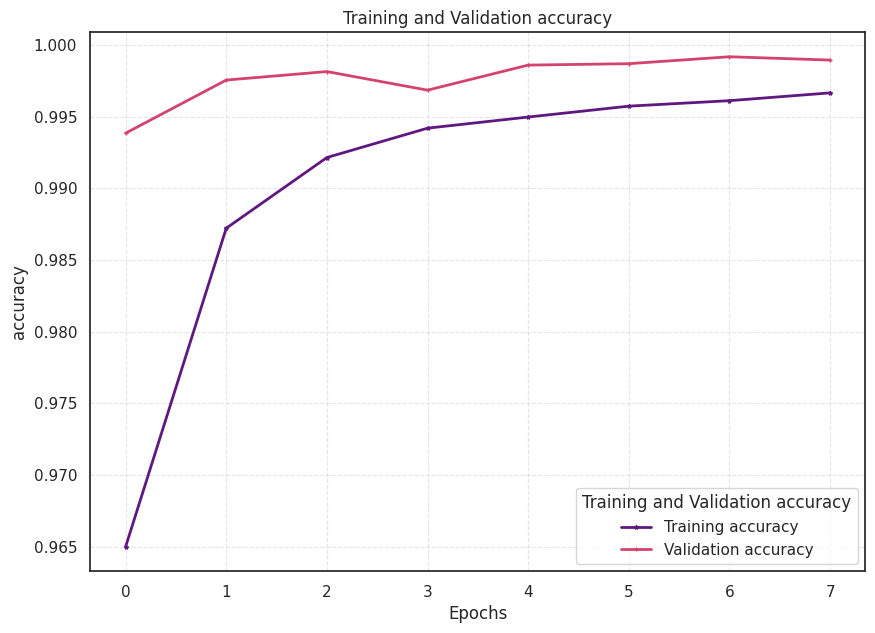

In [140]:
plot_line_matplotlib([history.history["accuracy"], history.history["val_accuracy"]],
                    labels=['Training accuracy', 'Validation accuracy'],
                    num_of_line=2,
                    linewidths=2,
                    markers = True,
                    markersize=3,
                    linestyles = False,
                    title='Training and Validation accuracy',
                    xlabel='Epochs',
                    ylabel='accuracy')

## Training and Validation loss

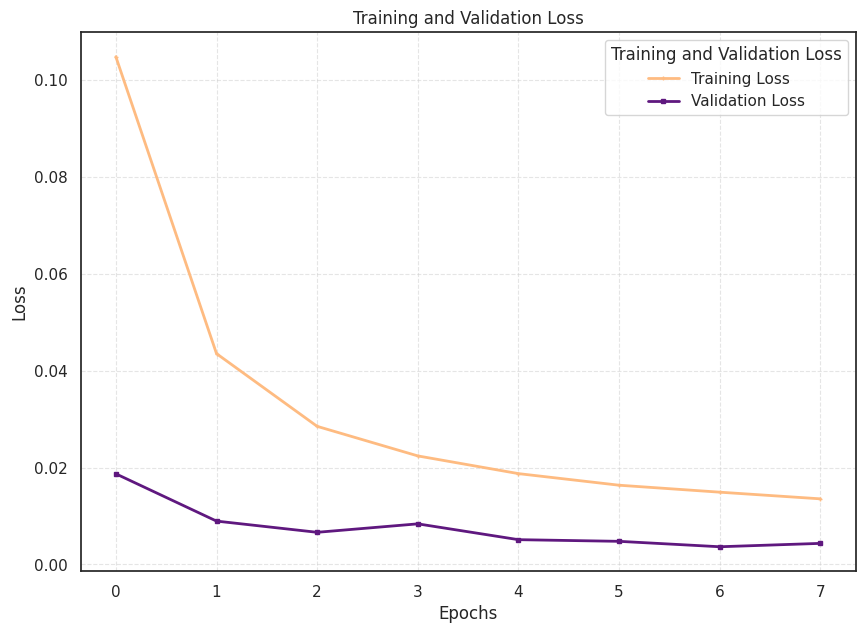

In [141]:
plot_line_matplotlib([history.history["loss"], history.history["val_loss"]],
                    labels=['Training Loss', 'Validation Loss'],
                    num_of_line=2,
                    linewidths=2,
                    markers = True,
                    markersize=3,
                    linestyles = False,
                    title='Training and Validation Loss',
                    xlabel='Epochs',
                    ylabel='Loss')

# save the model

### a. SavedModel Format

In [144]:
# Save the model
model.save('saved_model/my_model.keras')

#### To load the model

In [ ]:
# loaded_model = tf.keras.models.load_model('saved_model/my_model.keras')

### b. HDF5 Format

In [ ]:
# # Save the model as an HDF5 file
# model.save('my_model.h5')

#### To load the model

In [ ]:
# # Load the model
# loaded_model = tf.keras.models.load_model('my_model.h5')

### TensorFlow to ONNX

In [ ]:
# # Convert and save
# model_proto, _ = tf2onnx.convert.from_keras(model, output_path="model.onnx")